<h1>Prima ispezione dei dati</h1>

In [106]:
import math #operazioni matematiche complesse
import numpy as np #matrici e vettori
import pandas as pd #dataframe
import scipy.stats as stats
import matplotlib.pyplot as plt #plot
import seaborn as sns #plot
from collections import defaultdict
from scipy.stats.stats import pearsonr

C:\Users\Noemi\AppData\Local\Temp\ipykernel_11912\694262758.py:8: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [150]:
df = pd.read_csv('data/train.csv', skipinitialspace=True) 

In [151]:
df.head()

,name,duration_ms,explicit,popularity,artists,album_name,danceability,energy,key,loudness,...,liveness,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,popularity_confidence,processing,genre
0,Long Road,241760,False,46,Funki Porcini,Hed Phone Sex,0.690,0.513,5,-12.529,...,0.281,0.6350,142.221,241760,4.0,567.0,141.0,NaN,1.279305,j-dance
1,"Daniâl My Son, Where Did You Vanish?",444000,False,0,Siavash Amini,A Trail of Laughters,0.069,0.196,1,-24.801,...,0.360,0.0336,75.596,444000,4.0,617.0,155.0,NaN,2.367412,iranian
2,Ondskapens Galakse,333506,False,3,Kvelertak,Nattesferd,0.363,0.854,2,-7.445,...,0.262,0.4890,116.628,333507,4.0,652.0,162.0,NaN,3.700483,black-metal
3,Can't Look Away,269800,False,23,The Wood Brothers,One Drop of Truth,0.523,0.585,5,-5.607,...,0.117,0.3850,140.880,269800,4.0,619.0,155.0,0.469,1.279305,bluegrass
4,Thunderground,307651,False,25,The Darkraver;DJ Vince,Happy Hardcore Top 100,0.643,0.687,7,-11.340,...,0.299,0.6370,143.956,307652,4.0,733.0,183.0,NaN,4.067086,happy


In [152]:
df.describe()

,duration_ms,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,popularity_confidence,processing
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,10550.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,1.500000e+04,12938.000000,15000.000000,15000.00000,2217.000000,15000.000000
mean,2.468075e+05,27.423667,0.551063,0.656231,5.287867,-8.894999,0.631374,0.083779,0.303896,0.286734,0.216790,0.436853,123.116544,2.467947e+05,3.876179,501.862333,128.39340,0.490479,2.199647
std,1.279941e+05,18.587534,0.194239,0.264371,3.585023,6.005799,0.482455,0.086709,0.329536,0.382930,0.195295,0.277220,31.930958,1.279850e+05,0.566491,280.689804,75.11391,0.291330,1.212616
min,8.586000e+03,0.000000,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.587000e+03,0.000000,0.000000,0.00000,0.000000,0.748116
25%,1.800000e+05,14.000000,0.441000,0.480000,2.000000,-10.636250,0.000000,0.037300,0.009745,0.000000,0.097900,0.196000,99.939000,1.800000e+05,4.000000,327.000000,83.00000,0.230000,1.170953
50%,2.278260e+05,24.000000,0.580000,0.709000,5.000000,-7.303000,1.000000,0.051000,0.155000,0.003130,0.131000,0.416000,124.188000,2.278185e+05,4.000000,461.000000,117.00000,0.480000,1.738916
75%,2.889030e+05,42.000000,0.695000,0.884000,8.000000,-5.101000,1.000000,0.088600,0.573000,0.744000,0.280000,0.664000,141.986500,2.889030e+05,4.000000,625.000000,159.00000,0.739000,3.349057
max,4.120258e+06,94.000000,0.980000,1.000000,11.000000,3.156000,1.000000,0.939000,0.996000,1.000000,0.994000,0.995000,220.525000,4.120258e+06,5.000000,7348.000000,2170.00000,1.000000,4.067086


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   15000 non-null  object 
 1   duration_ms            15000 non-null  int64  
 2   explicit               15000 non-null  bool   
 3   popularity             15000 non-null  int64  
 4   artists                15000 non-null  object 
 5   album_name             15000 non-null  object 
 6   danceability           15000 non-null  float64
 7   energy                 15000 non-null  float64
 8   key                    15000 non-null  int64  
 9   loudness               15000 non-null  float64
 10  mode                   10550 non-null  float64
 11  speechiness            15000 non-null  float64
 12  acousticness           15000 non-null  float64
 13  instrumentalness       15000 non-null  float64
 14  liveness               15000 non-null  float64
 15  va

In [154]:
df.isnull().sum()

name                         0
duration_ms                  0
explicit                     0
popularity                   0
artists                      0
album_name                   0
danceability                 0
energy                       0
key                          0
loudness                     0
mode                      4450
speechiness                  0
acousticness                 0
instrumentalness             0
liveness                     0
valence                      0
tempo                        0
features_duration_ms         0
time_signature            2062
n_beats                      0
n_bars                       0
popularity_confidence    12783
processing                   0
genre                        0
dtype: int64

I nan sono in mode, time_signature e popularity_confidence

La quantità di brani è la stessa per ogni genere

In [155]:
df.groupby(['genre']).mean()

,duration_ms,explicit,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,popularity_confidence,processing
genre,,,,,,,,,,,,,,,,,,,,
afrobeat,255761.637333,0.018667,25.104000,0.631279,0.675015,5.372000,-8.225705,0.559322,0.079777,0.274824,0.256546,0.196136,0.632641,119.044092,255556.750667,3.911628,501.882667,128.588000,0.477034,2.218117
black-metal,312680.757333,0.141333,22.160000,0.298734,0.875368,5.504000,-6.508709,0.571977,0.087969,0.027036,0.438376,0.243304,0.194478,128.388135,312676.744000,3.818605,656.552000,171.869333,0.479532,2.167187
bluegrass,224340.145333,0.004000,26.738667,0.538100,0.537173,5.438667,-9.783220,0.833962,0.041848,0.539167,0.132831,0.222549,0.632191,125.319551,224340.520000,3.897991,457.505333,117.208000,0.511243,2.395470
brazil,272329.881333,0.080000,43.029333,0.554036,0.618380,5.357333,-7.759363,0.672381,0.094596,0.334509,0.022967,0.298859,0.466042,121.317551,272320.156000,3.955247,544.018667,137.853333,0.512413,2.191591
breakbeat,297002.881333,0.058667,21.272000,0.655724,0.835011,5.410667,-6.025184,0.587477,0.085956,0.040624,0.363216,0.210023,0.485040,131.591501,297003.284000,3.993846,647.614667,162.260000,0.486670,2.203220
chicago-house,327283.858667,0.024000,17.185333,0.753515,0.736044,5.736000,-8.546865,0.514440,0.072934,0.047374,0.421360,0.147124,0.563743,123.802607,327302.682667,3.982839,671.200000,168.578667,0.485371,2.015716
disney,151753.028000,0.000000,25.397333,0.518562,0.348533,4.386667,-13.748233,0.752363,0.084048,0.690654,0.312890,0.168950,0.441329,115.194593,151753.400000,3.800000,280.060000,73.281333,0.465467,2.486199
forro,202532.865333,0.018667,36.796000,0.632316,0.771311,5.168000,-5.505208,0.658349,0.055037,0.397581,0.013158,0.294420,0.726285,137.302480,202533.365333,3.966049,442.805333,111.184000,0.539073,2.185201
happy,238628.281333,0.117333,19.032000,0.574681,0.907287,5.769333,-5.203780,0.631179,0.112075,0.061112,0.217085,0.281472,0.399956,149.550319,238631.509333,3.962963,591.506667,148.524000,0.545302,2.185718


In [156]:
colonne=["n_bars", "n_beats"]
df['popularity']=df['popularity']/100
df[colonne]=df[colonne]*100
df.head()

,name,duration_ms,explicit,popularity,artists,album_name,danceability,energy,key,loudness,...,liveness,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,popularity_confidence,processing,genre
0,Long Road,241760,False,0.46,Funki Porcini,Hed Phone Sex,0.690,0.513,5,-12.529,...,0.281,0.6350,142.221,241760,4.0,56700.0,14100.0,NaN,1.279305,j-dance
1,"Daniâl My Son, Where Did You Vanish?",444000,False,0.00,Siavash Amini,A Trail of Laughters,0.069,0.196,1,-24.801,...,0.360,0.0336,75.596,444000,4.0,61700.0,15500.0,NaN,2.367412,iranian
2,Ondskapens Galakse,333506,False,0.03,Kvelertak,Nattesferd,0.363,0.854,2,-7.445,...,0.262,0.4890,116.628,333507,4.0,65200.0,16200.0,NaN,3.700483,black-metal
3,Can't Look Away,269800,False,0.23,The Wood Brothers,One Drop of Truth,0.523,0.585,5,-5.607,...,0.117,0.3850,140.880,269800,4.0,61900.0,15500.0,0.469,1.279305,bluegrass
4,Thunderground,307651,False,0.25,The Darkraver;DJ Vince,Happy Hardcore Top 100,0.643,0.687,7,-11.340,...,0.299,0.6370,143.956,307652,4.0,73300.0,18300.0,NaN,4.067086,happy


In [157]:
df["popularity_confidence"].shape[0]

15000

In [158]:
df['popularity_confidence']
df.isnull().sum()
for i in range(df["popularity_confidence"].shape[0]):
    a=df["popularity_confidence"][i]
    if math.isnan(a):
        #print(df["popularity_confidence"][i])
        df["popularity_confidence"][i]=0
df.head()

C:\Users\Noemi\AppData\Local\Temp\ipykernel_11912\3327555740.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["popularity_confidence"][i]=0


,name,duration_ms,explicit,popularity,artists,album_name,danceability,energy,key,loudness,...,liveness,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,popularity_confidence,processing,genre
0,Long Road,241760,False,0.46,Funki Porcini,Hed Phone Sex,0.690,0.513,5,-12.529,...,0.281,0.6350,142.221,241760,4.0,56700.0,14100.0,0.000,1.279305,j-dance
1,"Daniâl My Son, Where Did You Vanish?",444000,False,0.00,Siavash Amini,A Trail of Laughters,0.069,0.196,1,-24.801,...,0.360,0.0336,75.596,444000,4.0,61700.0,15500.0,0.000,2.367412,iranian
2,Ondskapens Galakse,333506,False,0.03,Kvelertak,Nattesferd,0.363,0.854,2,-7.445,...,0.262,0.4890,116.628,333507,4.0,65200.0,16200.0,0.000,3.700483,black-metal
3,Can't Look Away,269800,False,0.23,The Wood Brothers,One Drop of Truth,0.523,0.585,5,-5.607,...,0.117,0.3850,140.880,269800,4.0,61900.0,15500.0,0.469,1.279305,bluegrass
4,Thunderground,307651,False,0.25,The Darkraver;DJ Vince,Happy Hardcore Top 100,0.643,0.687,7,-11.340,...,0.299,0.6370,143.956,307652,4.0,73300.0,18300.0,0.000,4.067086,happy


In [159]:
df.corr()

,duration_ms,explicit,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,popularity_confidence,processing
duration_ms,1.000000,-0.048723,-0.076202,-0.080932,0.102996,0.016712,0.039403,-0.023310,-0.074774,-0.184902,0.079685,-0.021184,-0.141938,0.048765,0.999918,0.009033,0.839313,0.838041,-0.001725,-0.010400
explicit,-0.048723,1.000000,-0.013096,0.056992,0.124405,-0.000991,0.131777,-0.042846,0.294287,-0.113975,-0.125101,0.006995,0.008631,0.016972,-0.048699,0.051260,-0.039830,-0.039435,0.002224,-0.005878
popularity,-0.076202,-0.013096,1.000000,0.051046,-0.056547,-0.008992,0.046703,0.073043,-0.096382,0.078424,-0.266843,0.027105,0.077652,-0.024162,-0.076228,-0.003160,-0.084774,-0.089134,0.001410,0.008733
danceability,-0.080932,0.056992,0.051046,1.000000,0.193940,0.035311,0.385244,-0.072422,0.111454,-0.199082,-0.202316,-0.174193,0.559578,0.092267,-0.080891,0.292167,-0.033604,-0.069332,0.008744,-0.026273
energy,0.102996,0.124405,-0.056547,0.193940,1.000000,0.057815,0.720907,-0.079969,0.143454,-0.699454,-0.203111,0.191024,0.284069,0.331538,0.102985,0.204646,0.243586,0.208615,0.001171,-0.037847
key,0.016712,-0.000991,-0.008992,0.035311,0.057815,1.000000,0.047718,-0.157515,0.018157,-0.049867,-0.001532,-0.007420,0.028221,0.022414,0.016786,0.028388,0.027133,0.022042,0.003335,-0.490366
loudness,0.039403,0.131777,0.046703,0.385244,0.720907,0.047718,1.000000,-0.033544,0.109793,-0.552519,-0.447106,0.047502,0.377743,0.308203,0.039415,0.250568,0.165565,0.131064,0.014984,-0.020563
mode,-0.023310,-0.042846,0.073043,-0.072422,-0.079969,-0.157515,-0.033544,1.000000,-0.064289,0.085246,-0.080035,0.015738,-0.006907,-0.013001,-0.023409,-0.019378,-0.030685,-0.027687,0.007124,0.261129
speechiness,-0.074774,0.294287,-0.096382,0.111454,0.143454,0.018157,0.109793,-0.064289,1.000000,-0.087997,-0.115803,0.050034,0.056068,0.062161,-0.074722,0.080739,-0.043217,-0.040820,0.000124,-0.022909
acousticness,-0.184902,-0.113975,0.078424,-0.199082,-0.699454,-0.049867,-0.552519,0.085246,-0.087997,1.000000,0.094256,-0.075924,-0.131961,-0.244244,-0.184846,-0.139706,-0.283324,-0.248164,-0.004258,0.022684


<AxesSubplot:>

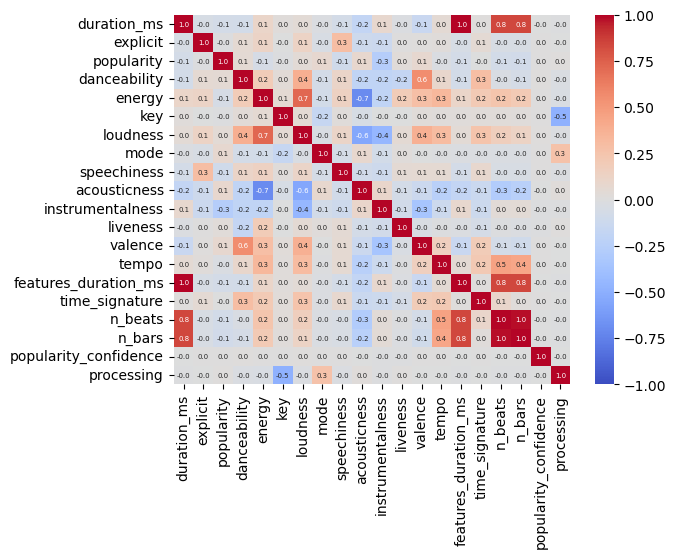

In [160]:
sns.heatmap(df.corr(method='pearson'), cmap="coolwarm", vmin=-1, vmax=1, annot=True, annot_kws={'fontsize':5}, fmt=".1f" )

<h3>Io che faccio la cretina</h3>

In [161]:
df[df['popularity'] == 0]

,name,duration_ms,explicit,popularity,artists,album_name,danceability,energy,key,loudness,...,liveness,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,popularity_confidence,processing,genre
1,"Daniâl My Son, Where Did You Vanish?",444000,False,0.0,Siavash Amini,A Trail of Laughters,0.069,0.196,1,-24.801,...,0.3600,0.0336,75.596,444000,4.0,61700.0,15500.0,0.000,2.367412,iranian
33,Meu Vício É Você,144906,False,0.0,Zezo,Zezo (O Príncipe dos Teclados),0.771,0.856,1,-2.340,...,0.1050,0.7130,111.064,144907,4.0,26800.0,6600.0,0.000,2.367412,forro
35,Battle Cry,175200,True,0.0,Kraff Gad,Battle Cry,0.867,0.487,7,-9.212,...,0.0872,0.2040,100.104,175200,4.0,28800.0,7200.0,0.000,4.067086,j-dance
38,Vou Te Procurar,213916,False,0.0,Asas Livres,Asas Livres & Pablo: Retrô (Ao Vivo),0.780,0.541,0,-7.750,...,0.5730,0.8300,128.901,213917,4.0,45800.0,11300.0,0.000,3.349057,forro
40,The Light Tears Apart,256687,False,0.0,Shivered,Journey to Fade,0.443,0.932,4,-5.086,...,0.3750,0.4540,159.935,256688,4.0,66400.0,16600.0,0.000,0.916010,iranian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14943,Run Like Hell,170513,False,0.0,Azhirock,Lucifer : Annihilated,0.649,0.944,11,-5.197,...,0.3380,0.3100,110.022,170514,4.0,30800.0,7500.0,0.000,0.748116,iranian
14950,I like It Loud (Original Mix) - Extended Mix,359609,False,0.0,The Prophet,The Hardcore Archive Part 3 (1997),0.748,0.984,1,-5.865,...,0.2990,0.1620,92.456,359610,4.0,54200.0,13600.0,0.000,2.367412,happy
14954,777,380613,False,0.0,Aquasky Vs Masterblaster,Urban Funk Breaks 2,0.569,0.966,11,-7.975,...,0.0465,0.9050,136.007,380613,4.0,85500.0,21300.0,0.417,0.748116,breakbeat
14989,Trail of Tears,162360,False,0.0,The Budos Band,Burnt Offering,0.532,0.641,0,-6.999,...,0.1030,0.6040,96.142,162360,4.0,25400.0,6400.0,0.000,3.349057,afrobeat


In [162]:
df[df['popularity'] == 0.86]

,name,duration_ms,explicit,popularity,artists,album_name,danceability,energy,key,loudness,...,liveness,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,popularity_confidence,processing,genre


In [163]:
df['genre'].unique()

array(['j-dance', 'iranian', 'black-metal', 'bluegrass', 'happy',
       'industrial', 'j-idol', 'spanish', 'sleep', 'techno', 'mandopop',
       'afrobeat', 'disney', 'study', 'indian', 'idm', 'forro',
       'chicago-house', 'brazil', 'breakbeat'], dtype=object)

In [164]:
for g in df['genre'].unique():
    print(g)
    print(df[df['genre'] == g].describe().iloc[1])
    print('')

j-dance
duration_ms              197655.825333
popularity                    0.232533
danceability                  0.669460
energy                        0.704638
key                           5.134667
loudness                     -6.104521
mode                          0.541353
speechiness                   0.206154
acousticness                  0.230750
instrumentalness              0.028364
liveness                      0.184856
valence                       0.574876
tempo                       116.152327
features_duration_ms     197656.249333
time_signature                4.067293
n_beats                   37859.333333
n_bars                     9577.066667
popularity_confidence         0.062411
processing                    2.171025
Name: mean, dtype: float64

iranian
duration_ms              318245.033333
popularity                    0.041520
danceability                  0.304377
energy                        0.546381
key                           5.238667
loudness            

duration_ms              297002.881333
popularity                    0.212720
danceability                  0.655724
energy                        0.835011
key                           5.410667
loudness                     -6.025184
mode                          0.587477
speechiness                   0.085956
acousticness                  0.040624
instrumentalness              0.363216
liveness                      0.210023
valence                       0.485040
tempo                       131.591501
features_duration_ms     297003.284000
time_signature                3.993846
n_beats                   64761.466667
n_bars                    16226.000000
popularity_confidence         0.072676
processing                    2.203220
Name: mean, dtype: float64



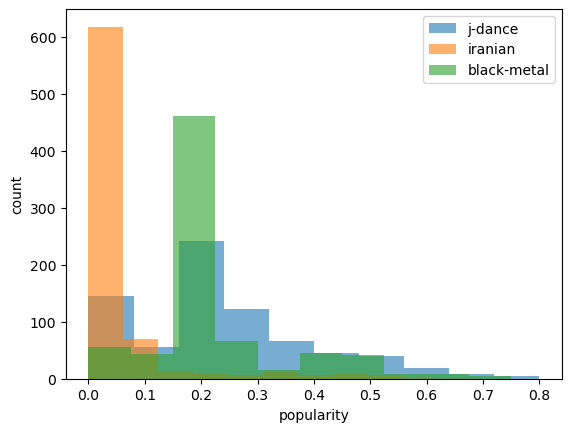

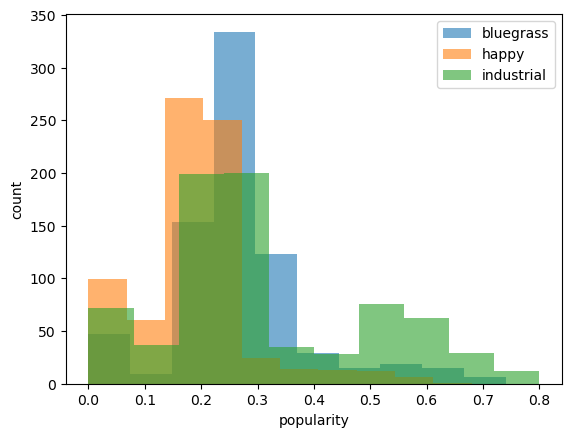

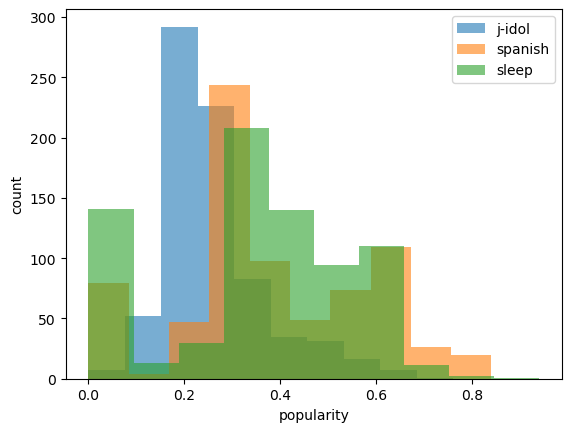

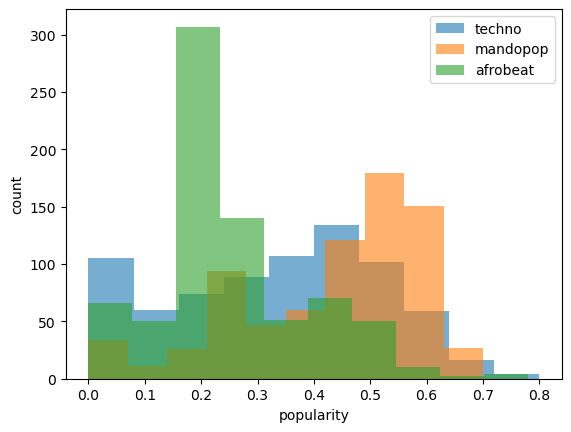

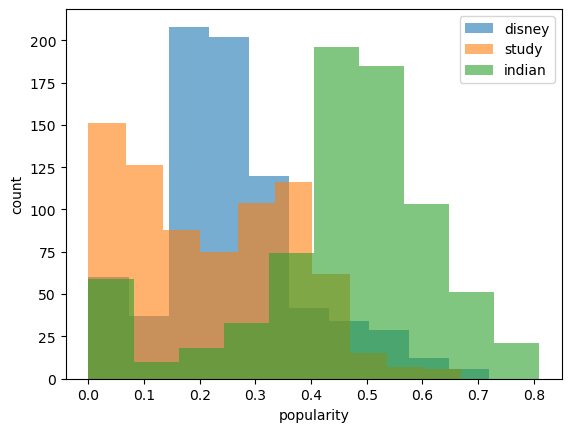

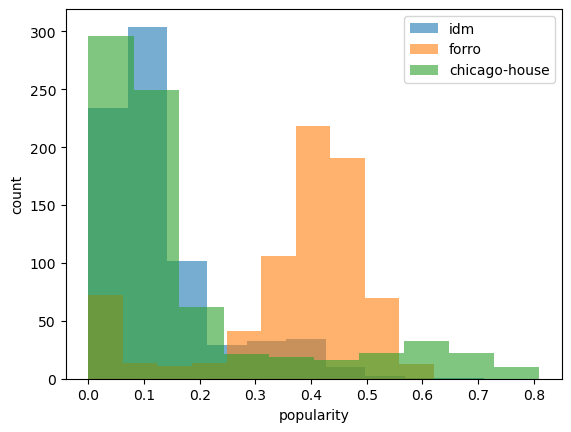

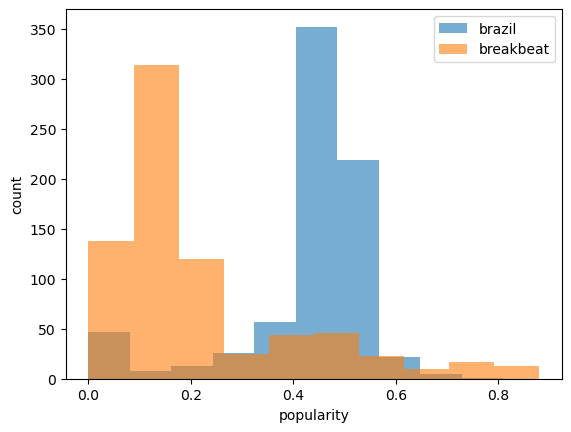

In [165]:
generi=df['genre'].unique()
for n in range(0, len(generi), 3):
    gen=generi[n:(n+3)]
    for g in gen:
        plt.hist(df[df['genre'] == g]['popularity'], 
             label=g,
             alpha=0.6
            )
    plt.xlabel("popularity")
    plt.ylabel("count")
    plt.legend()
    plt.show()

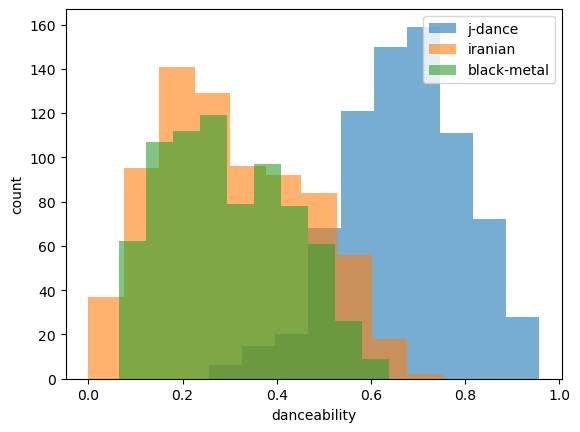

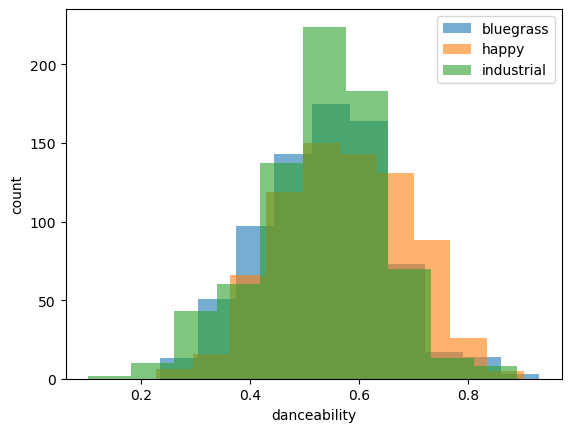

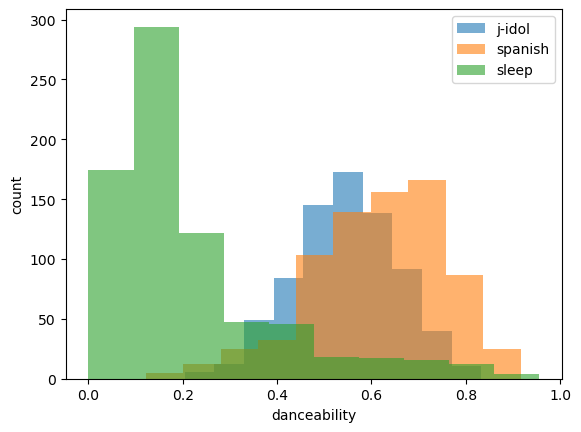

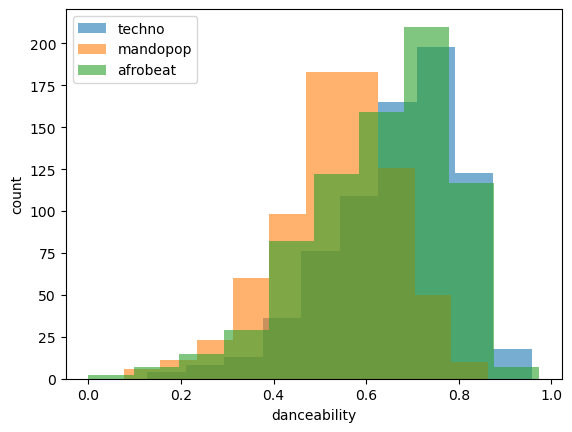

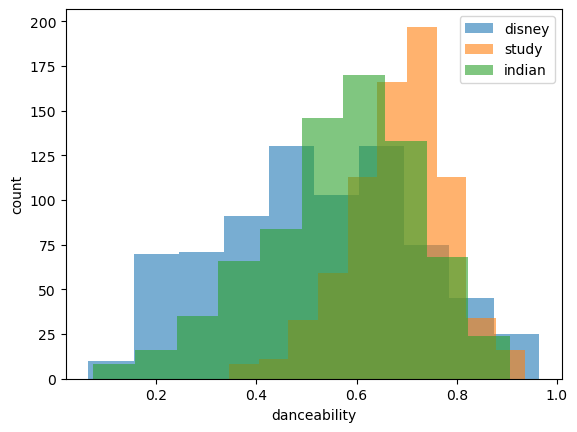

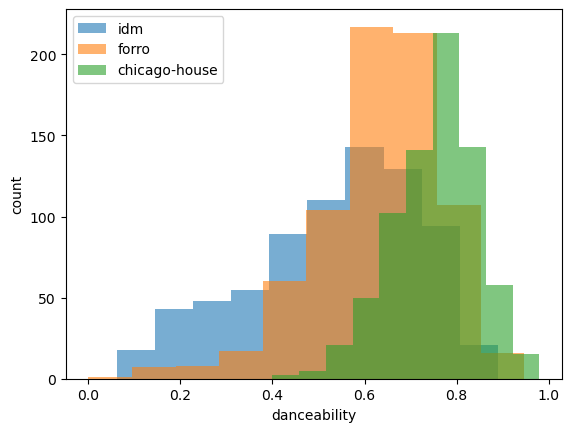

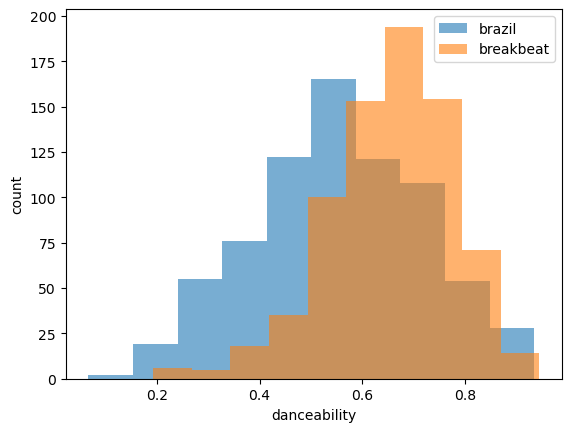

In [166]:
generi=df['genre'].unique()
for n in range(0, len(generi), 3):
    gen=generi[n:(n+3)]
    for g in gen:
        plt.hist(df[df['genre'] == g]['danceability'], 
             label=g,
             alpha=0.6
            )
    plt.xlabel("danceability")
    plt.ylabel("count")
    plt.legend()
    plt.show()

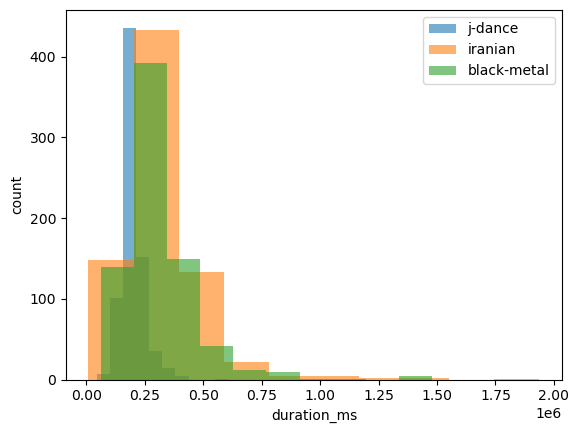

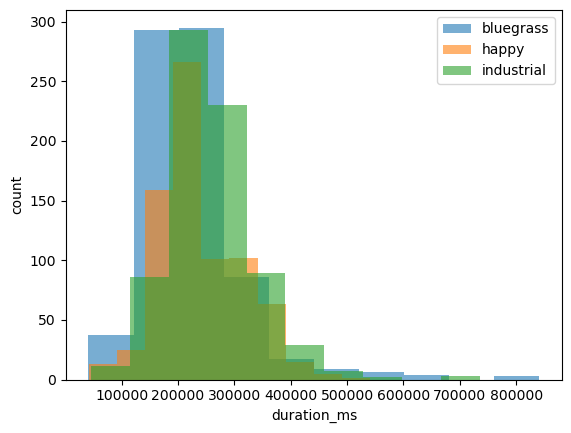

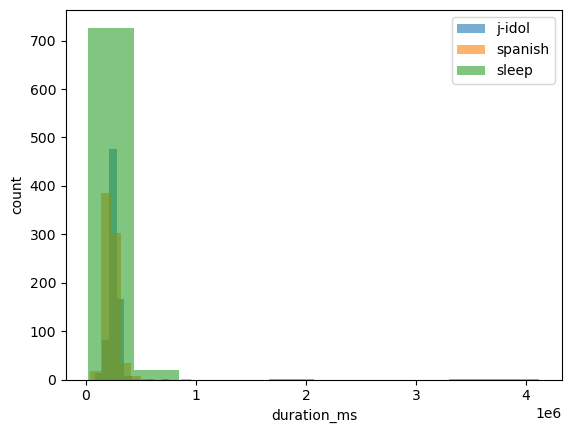

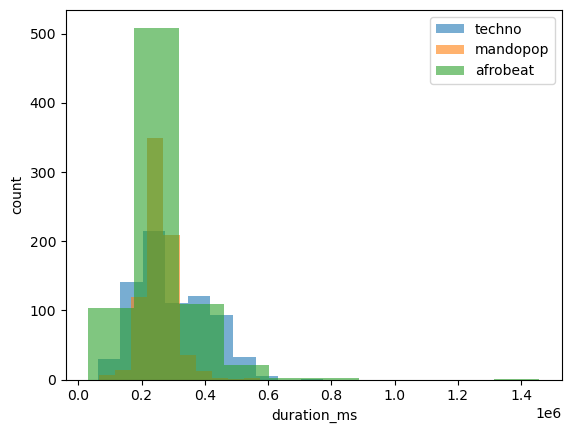

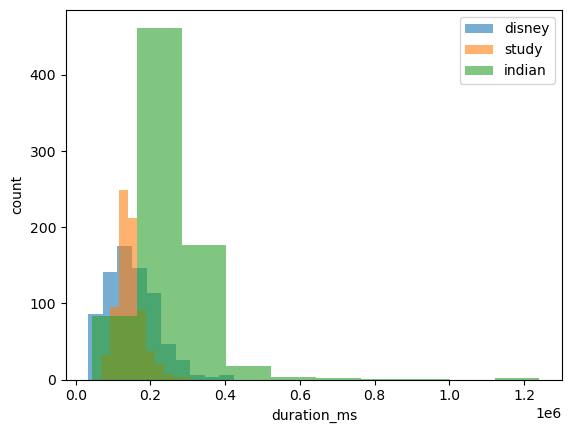

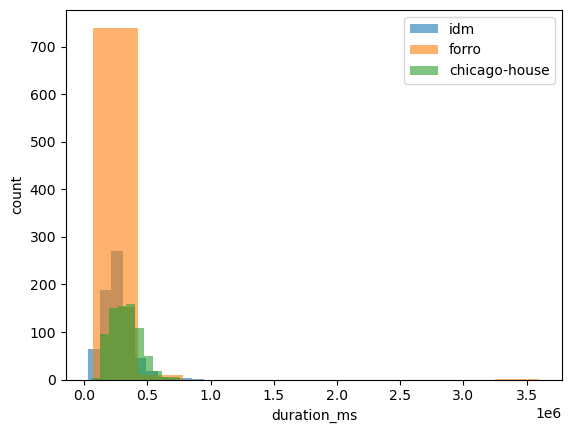

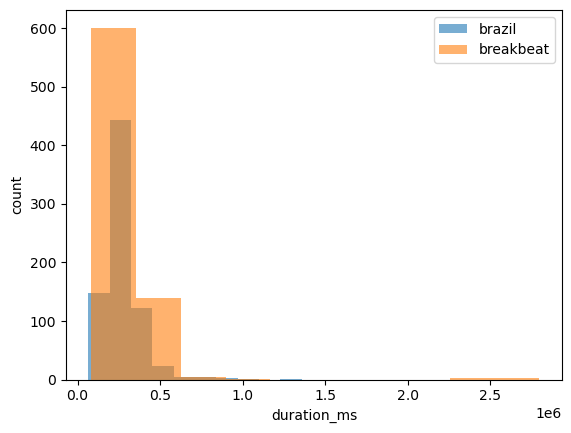

In [167]:
generi=df['genre'].unique()
for n in range(0, len(generi), 3):
    gen=generi[n:(n+3)]
    for g in gen:
        plt.hist(df[df['genre'] == g]['duration_ms'], 
             label=g,
             alpha=0.6
            )
    plt.xlabel("duration_ms")
    plt.ylabel("count")
    plt.legend()
    plt.show()

j-dance


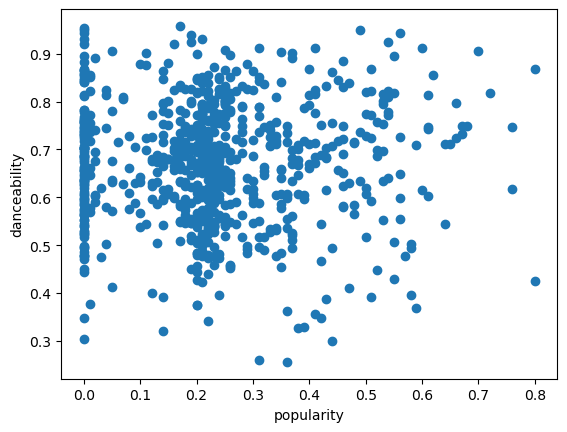

iranian


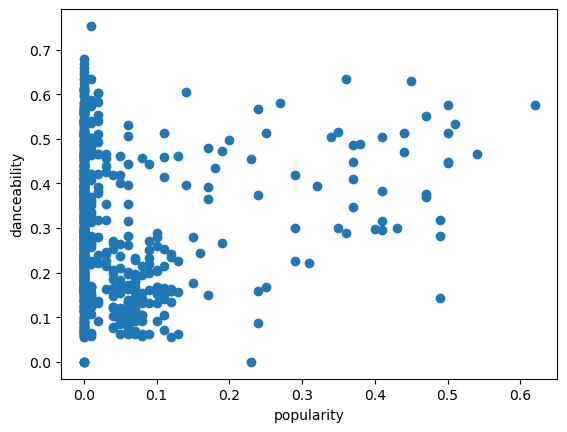

black-metal


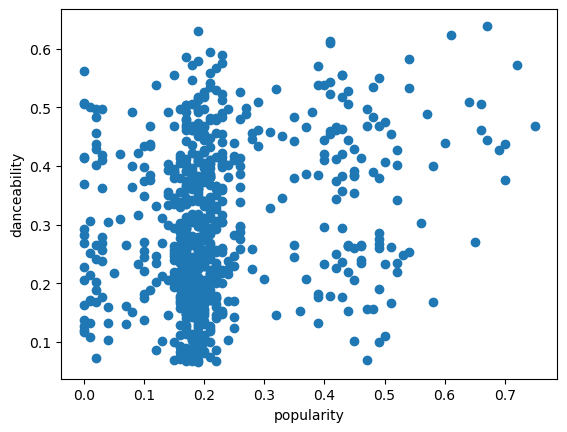

bluegrass


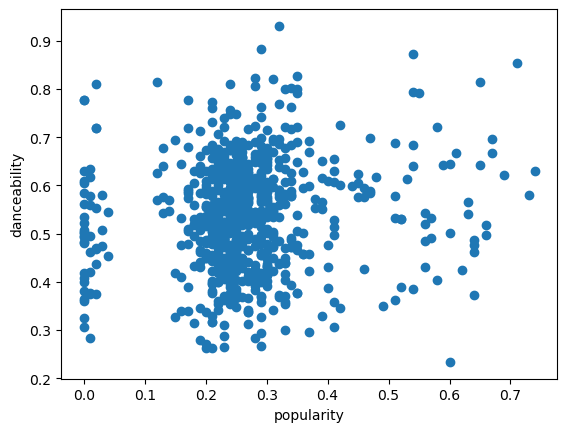

happy


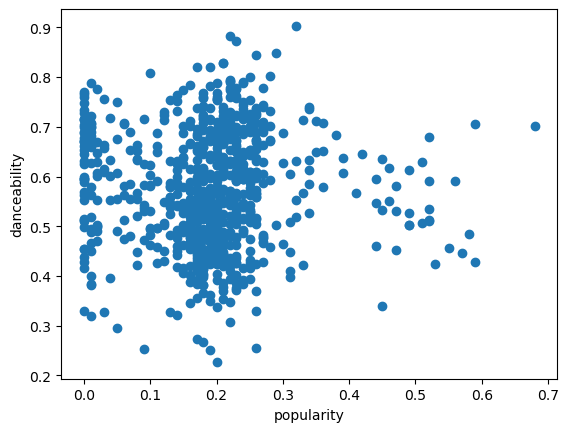

industrial


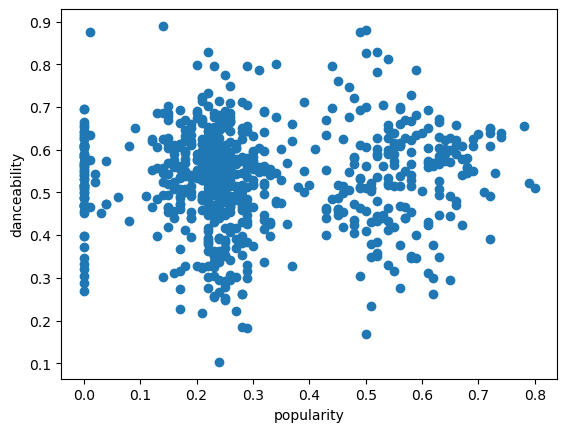

j-idol


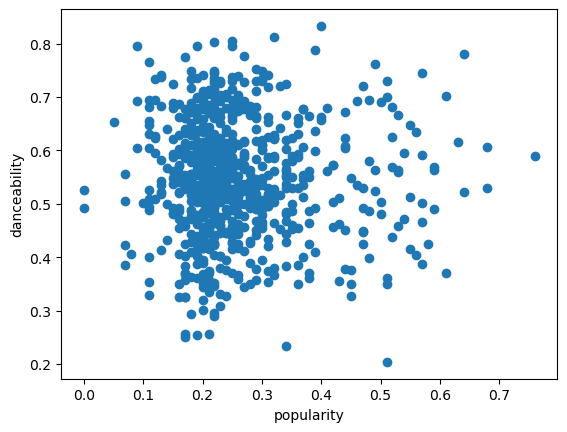

spanish


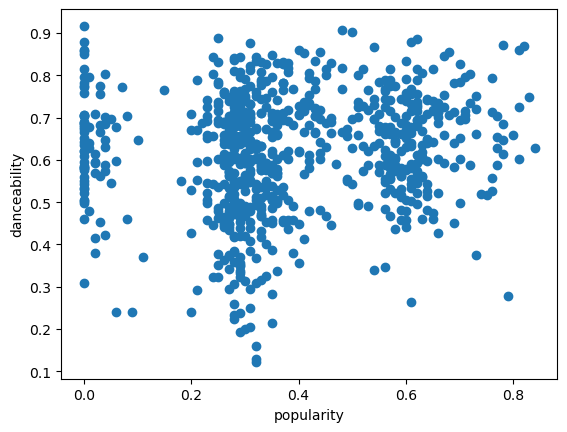

sleep


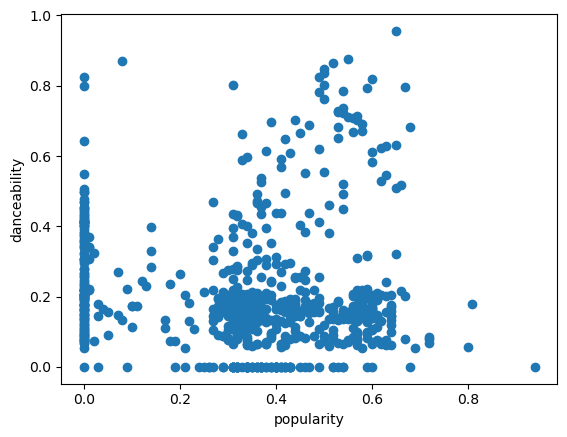

techno


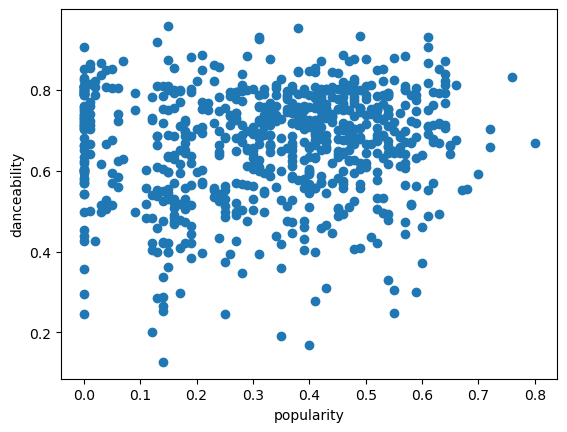

mandopop


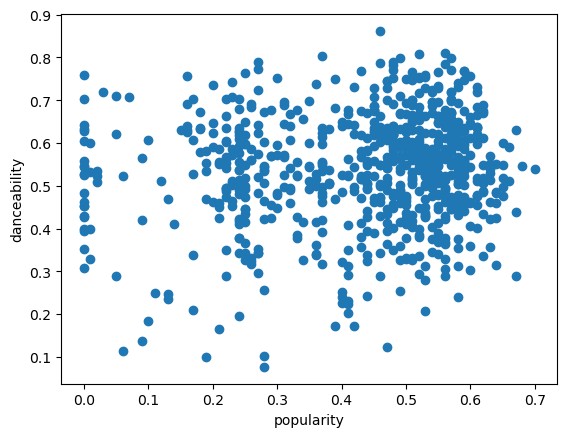

afrobeat


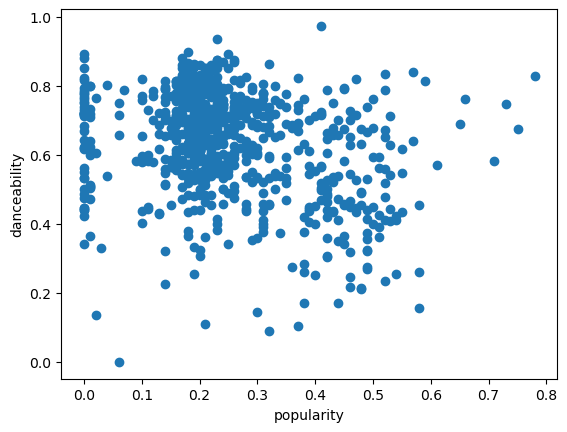

disney


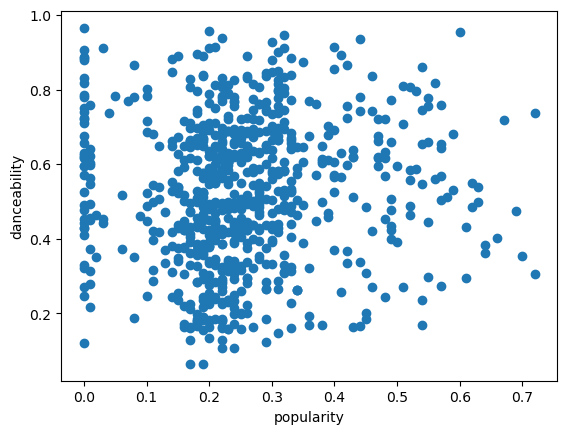

study


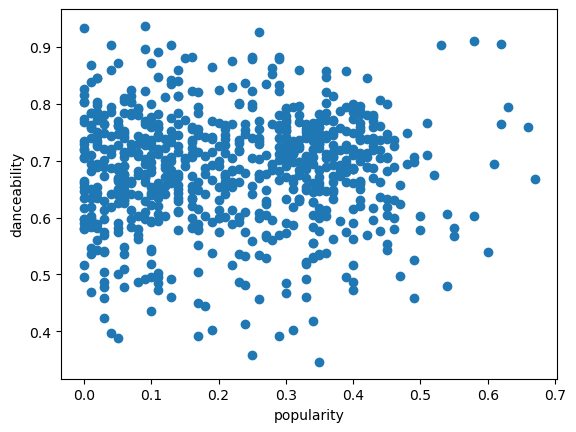

indian


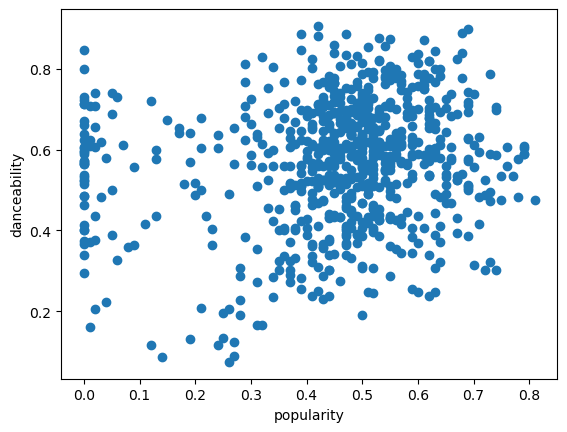

idm


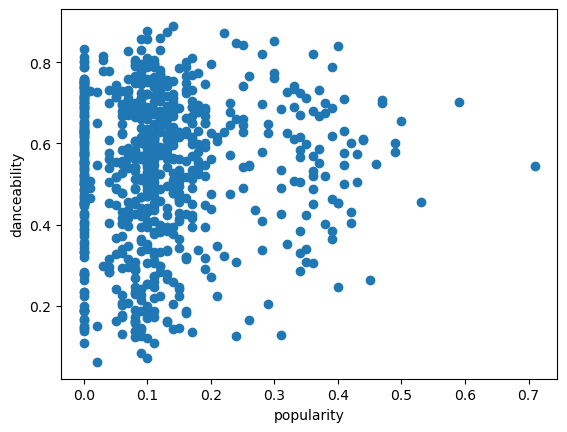

forro


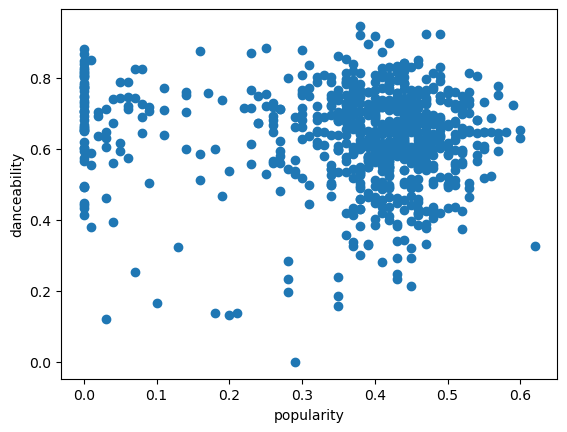

chicago-house


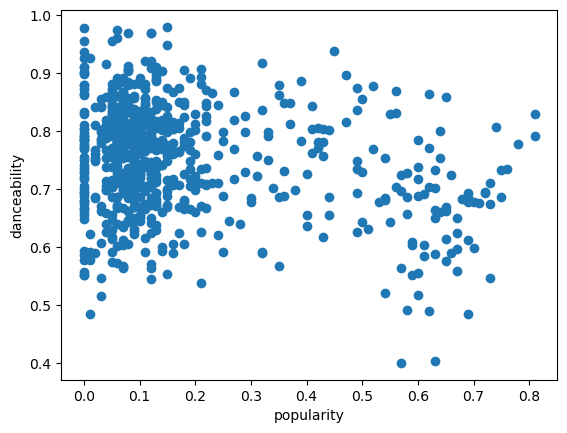

brazil


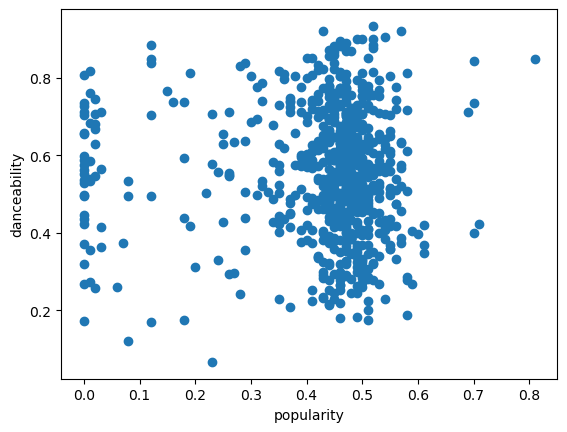

breakbeat


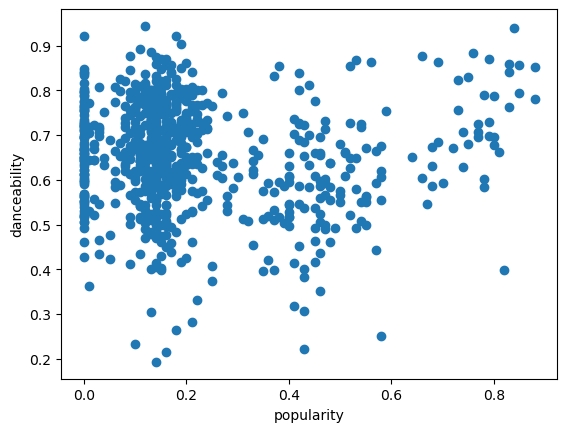

In [168]:
generi=df['genre'].unique()
for n in range(len(generi)):
    print(generi[n])
    plt.scatter(df[df['genre'] == generi[n]]['popularity'], df[df['genre'] == generi[n]]['danceability'])
    plt.xlabel('popularity')
    plt.ylabel('danceability')
    plt.show()

j-dance


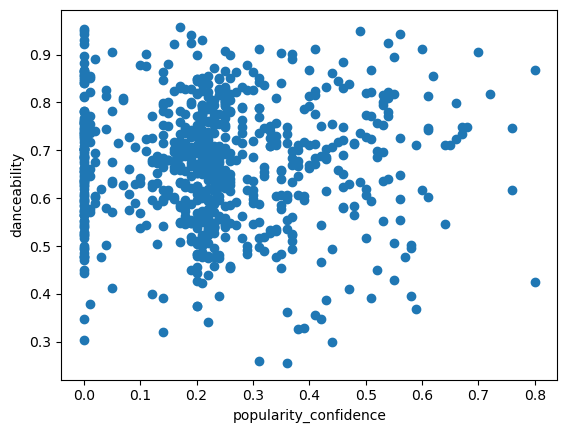

iranian


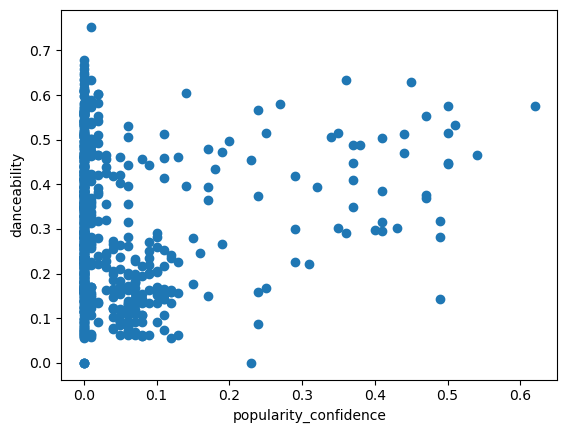

black-metal


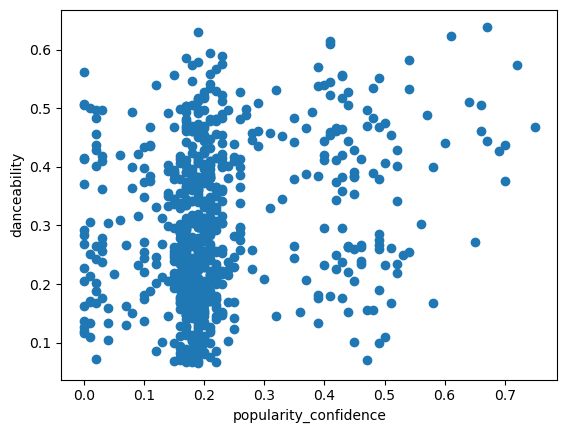

bluegrass


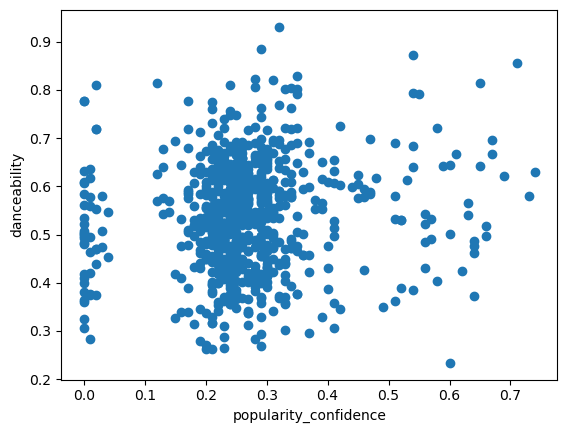

happy


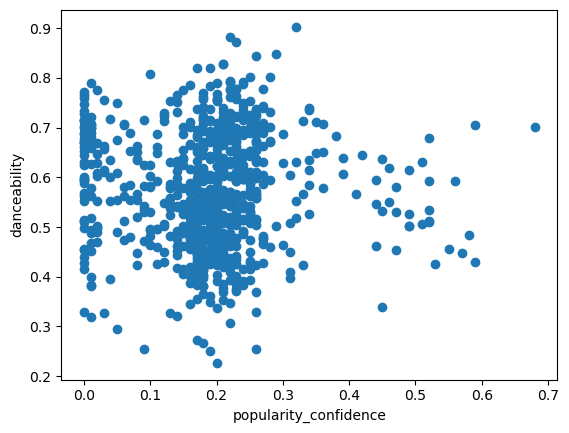

industrial


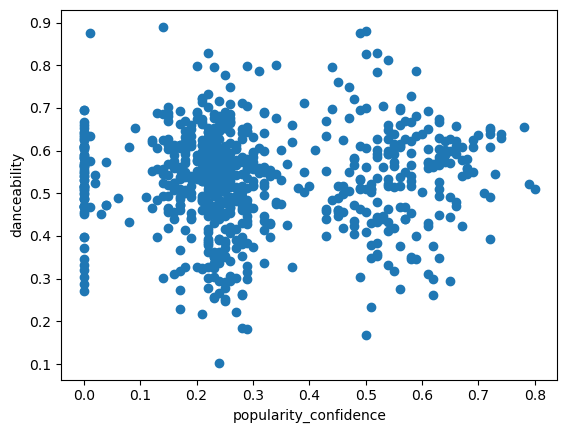

j-idol


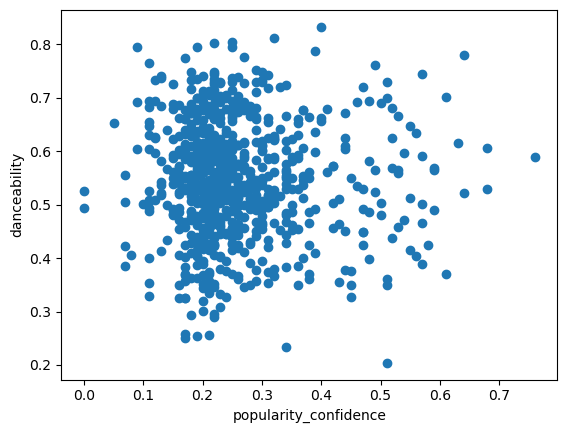

spanish


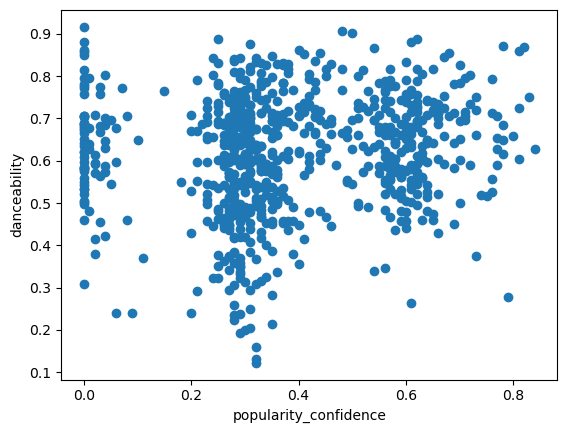

sleep


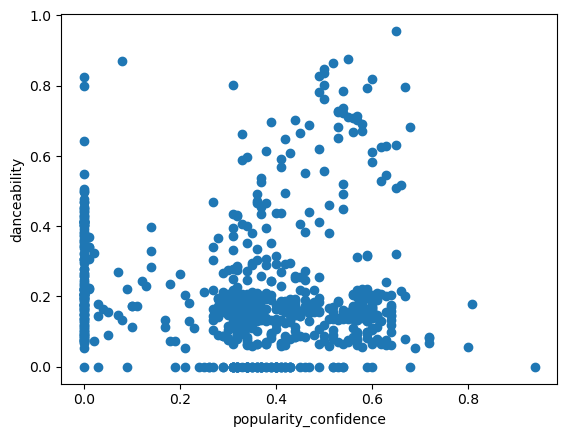

techno


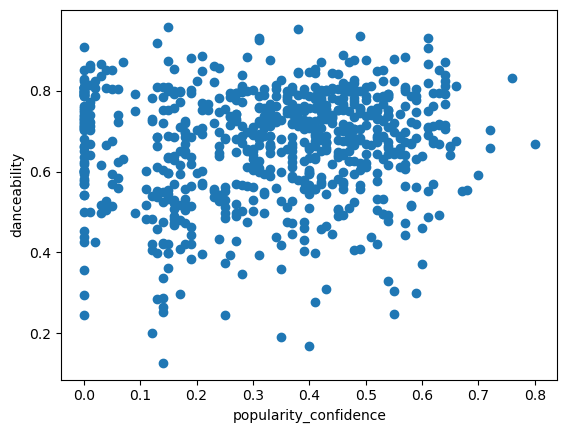

mandopop


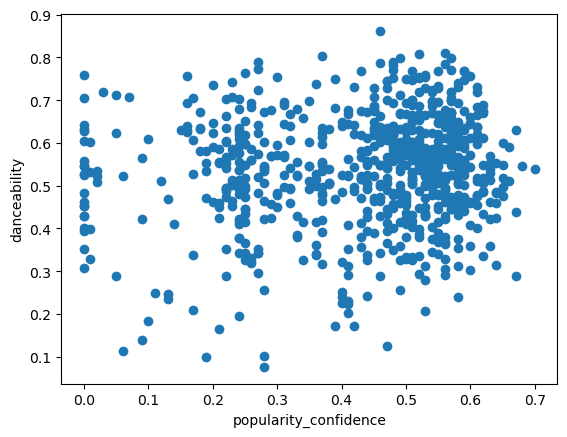

afrobeat


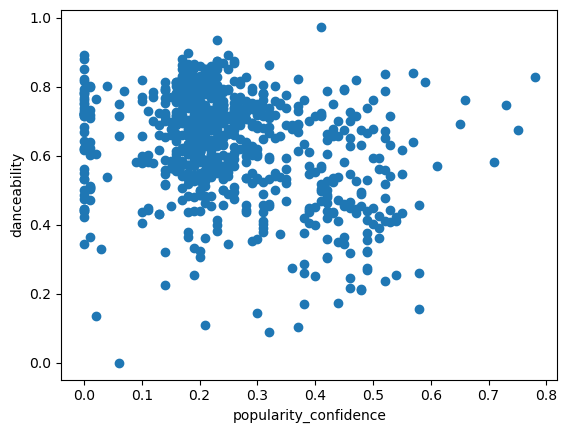

disney


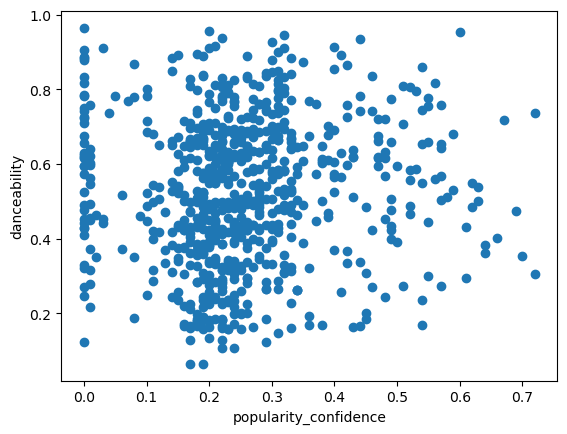

study


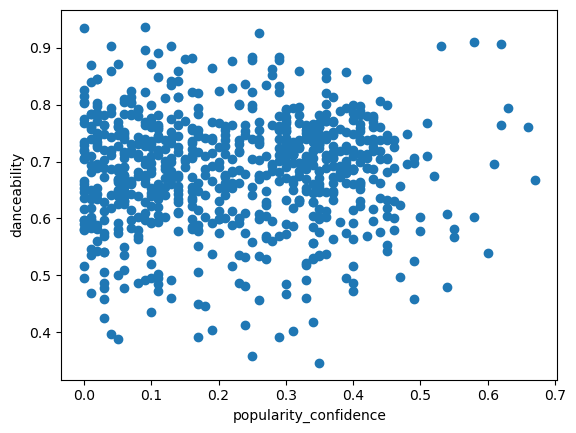

indian


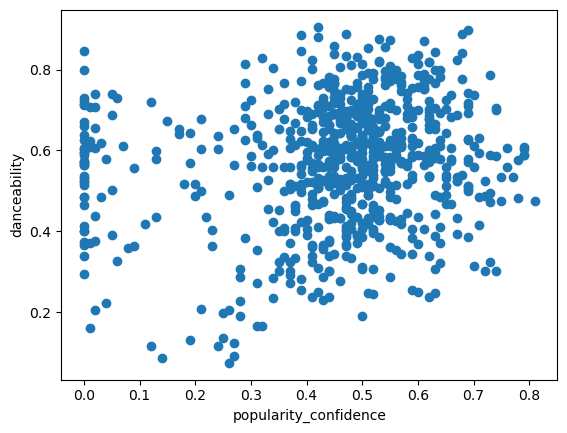

idm


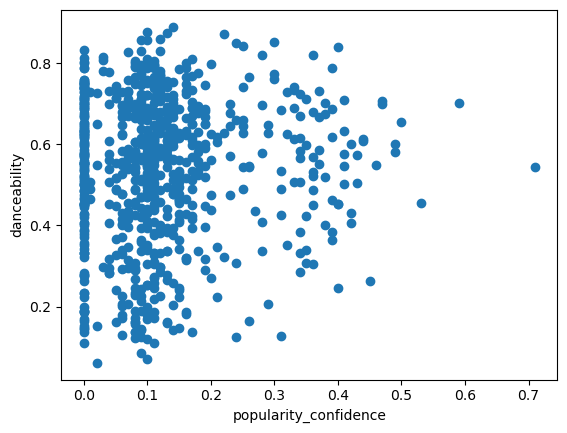

forro


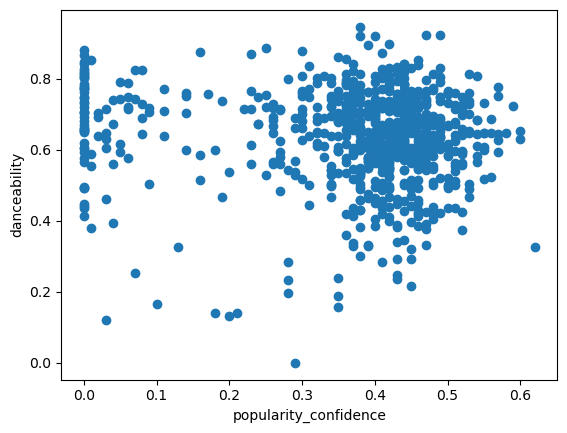

chicago-house


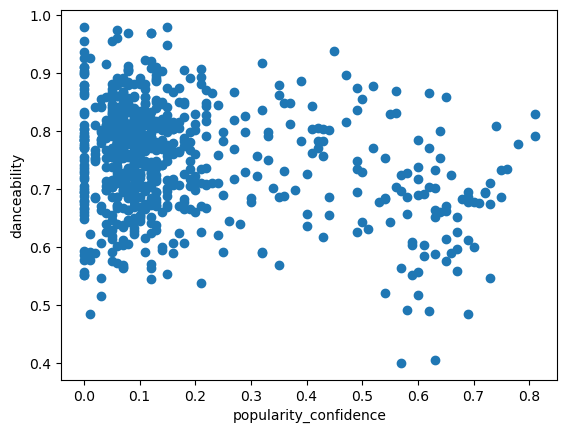

brazil


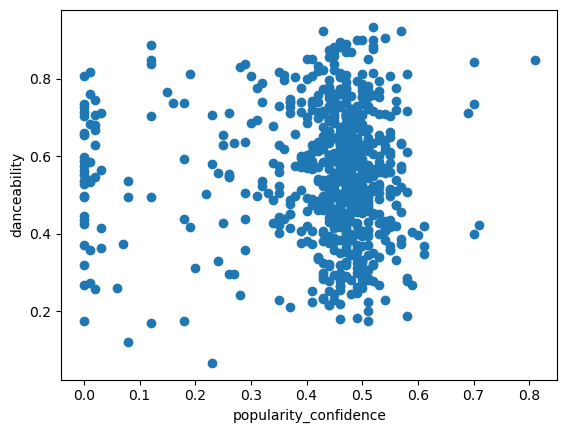

breakbeat


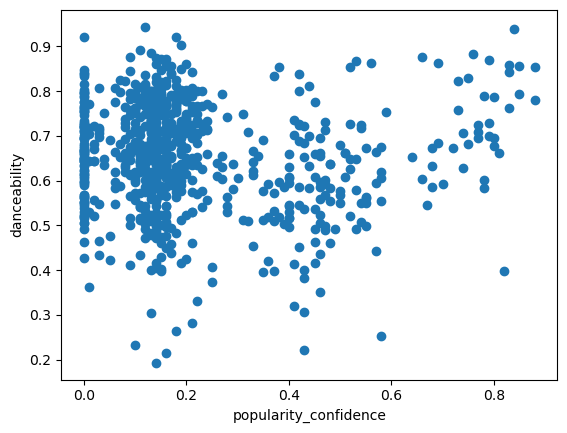

In [169]:
generi=df['genre'].unique()
for n in range(len(generi)):
    print(generi[n])
    plt.scatter(df[df['genre'] == generi[n]]['popularity'], df[df['genre'] == generi[n]]['danceability'])
    plt.xlabel('popularity_confidence')
    plt.ylabel('danceability')
    plt.show()

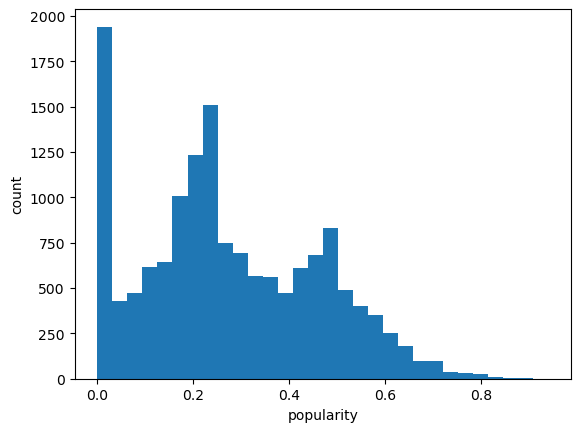

In [170]:
plt.hist(df['popularity'], bins=30)
plt.xlabel("popularity")
plt.ylabel("count")
plt.show()

Potevo fare una griaglia ma volevo fare in fretta

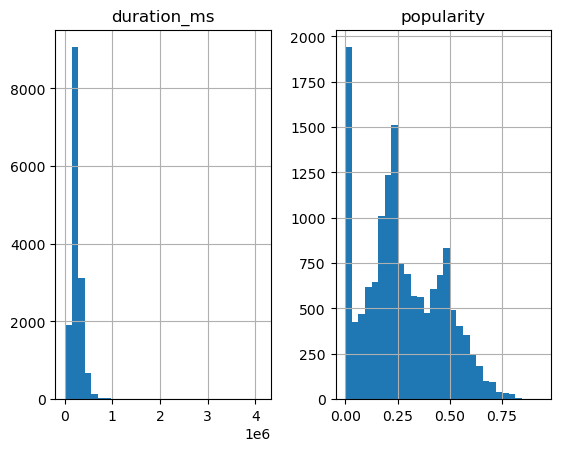

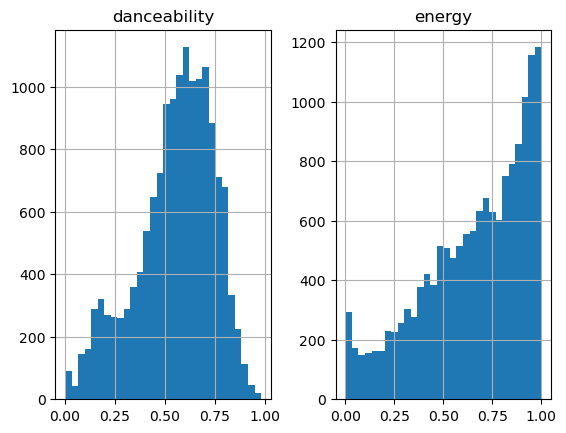

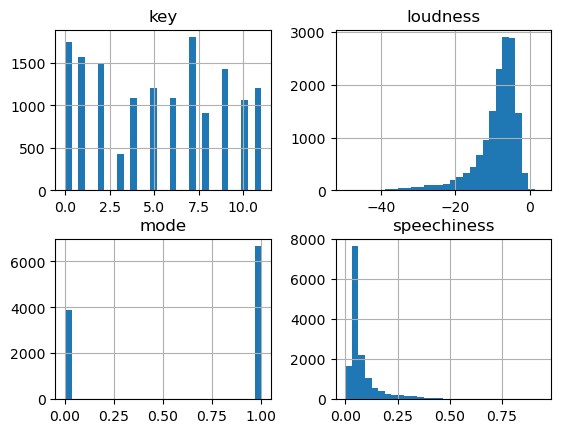

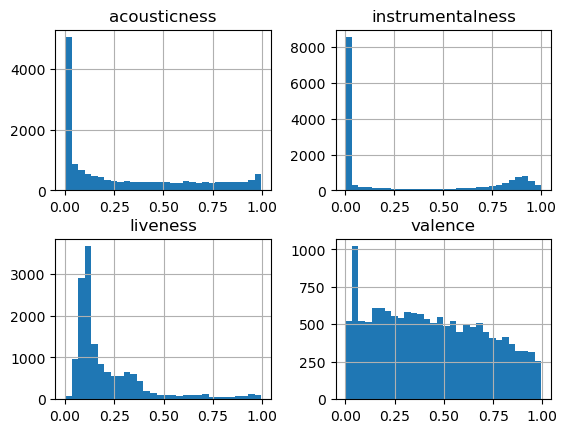

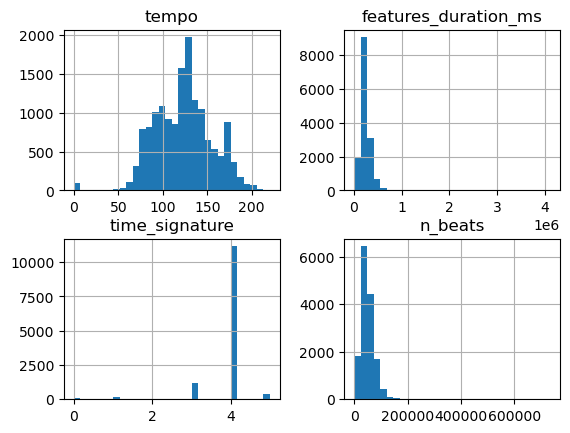

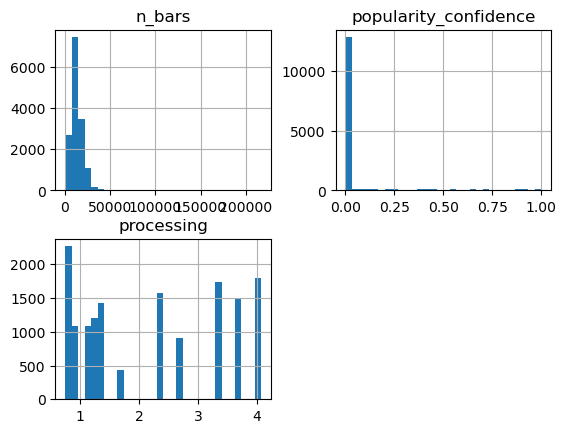

In [171]:
chiavi=df.keys()
for n in range(0, len(chiavi), 4):
    k=chiavi[n:(n+4)]
    sottodf=df[k]
    sottodf.hist(bins=30)
    plt.show()

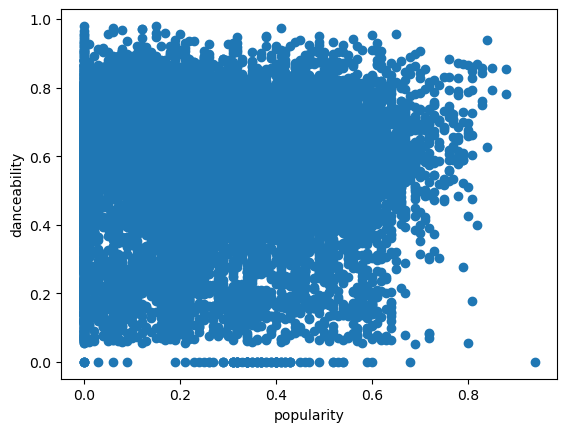

In [172]:
plt.scatter(df['popularity'], df['danceability'])
plt.xlabel('popularity')
plt.ylabel('danceability')
plt.show()

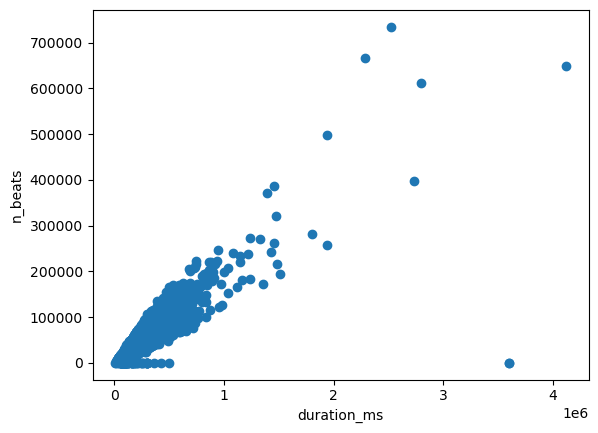

In [173]:
plt.scatter(df['duration_ms'], df['n_beats'])
plt.xlabel('duration_ms')
plt.ylabel('n_beats')
plt.show()

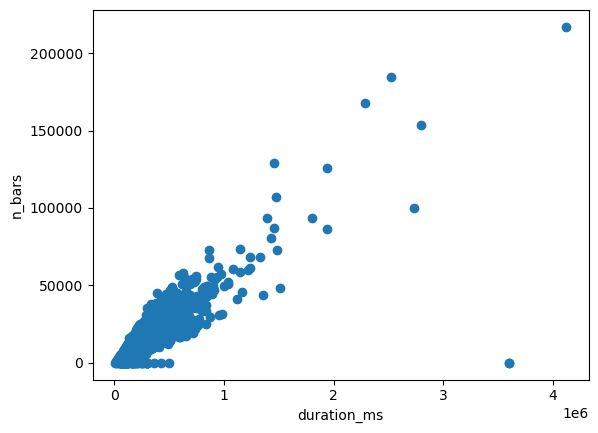

In [174]:
plt.scatter(df['duration_ms'], df['n_bars'])
plt.xlabel('duration_ms')
plt.ylabel('n_bars')
plt.show()

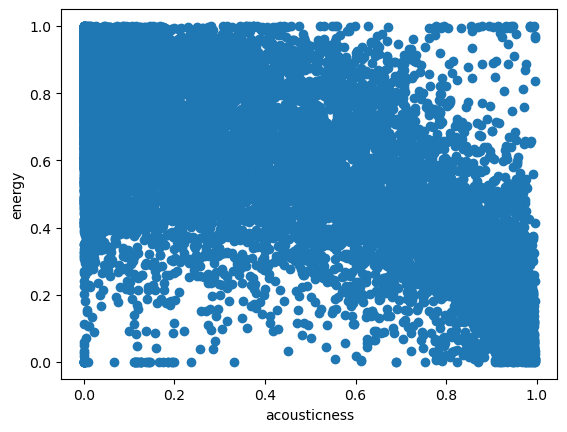

In [175]:
plt.scatter(df['acousticness'], df['energy'])
plt.xlabel('acousticness')
plt.ylabel('energy')
plt.show()

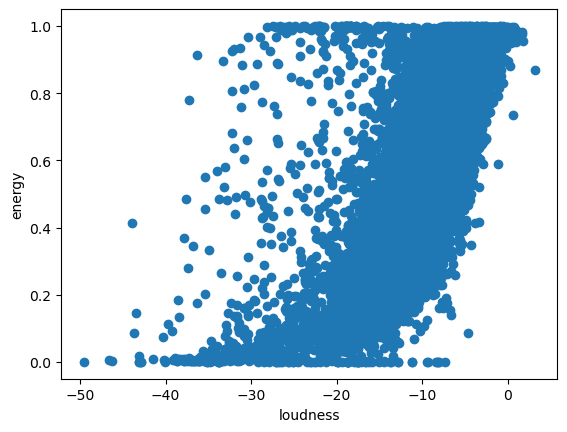

In [176]:
plt.scatter(df['loudness'], df['energy'])
plt.xlabel('loudness')
plt.ylabel('energy')
plt.show()

In [177]:
explicit = sorted(df['explicit'].unique())
explicit_mapping = dict(zip(explicit, range(0, len(explicit) + 1)))
explicit_mapping

{False: 0, True: 1}

In [178]:
df['expl_val'] = df['explicit'].map(explicit_mapping).astype(int)
df[['explicit', 'expl_val']].head()

,explicit,expl_val
0,False,0
1,False,0
2,False,0
3,False,0
4,False,0


([<matplotlib.axis.XTick at 0x281e6b9eee0>,
 [Text(0, 0, 'non explicit'), Text(1, 0, 'explicit')])

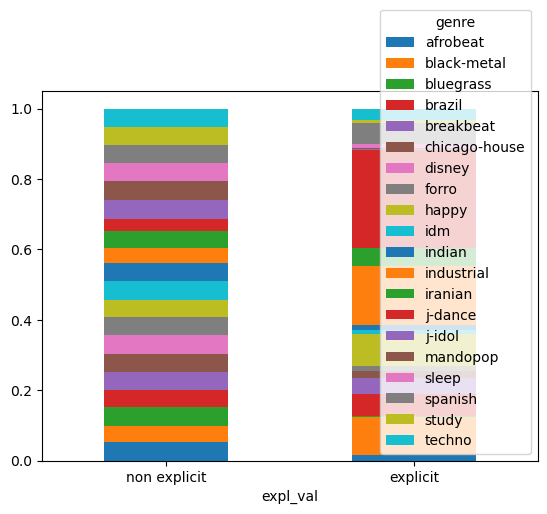

In [179]:
expl_val_xt = pd.crosstab(df['expl_val'], df['genre'])
expl_val_xt_pct = expl_val_xt.div(expl_val_xt.sum(1).astype(float), axis=0)
expl_val_xt_pct.plot(kind='bar', stacked=True, 
                    title='')
plt.xticks([0, 1], ['non explicit', 'explicit'], rotation=0)

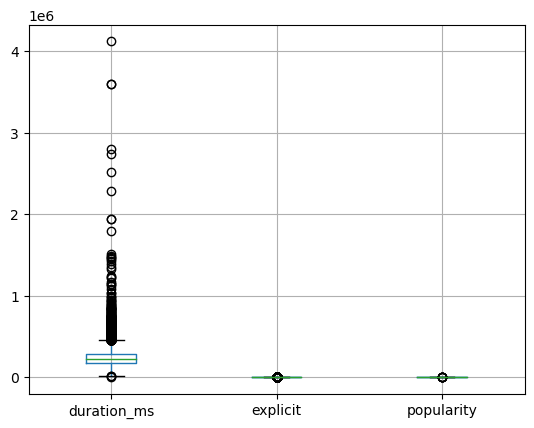

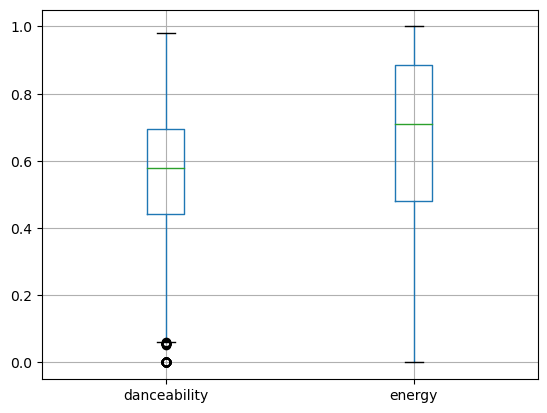

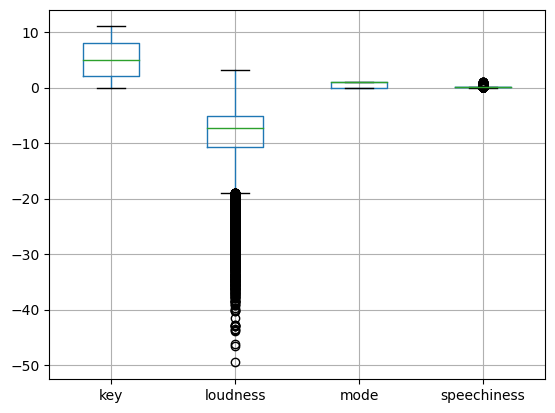

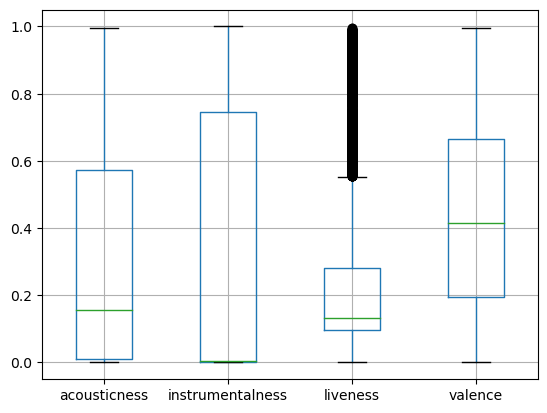

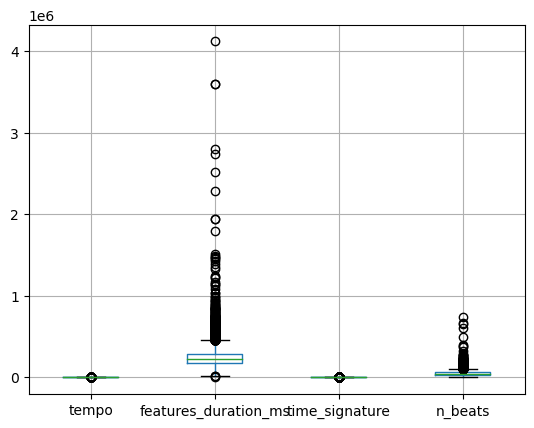

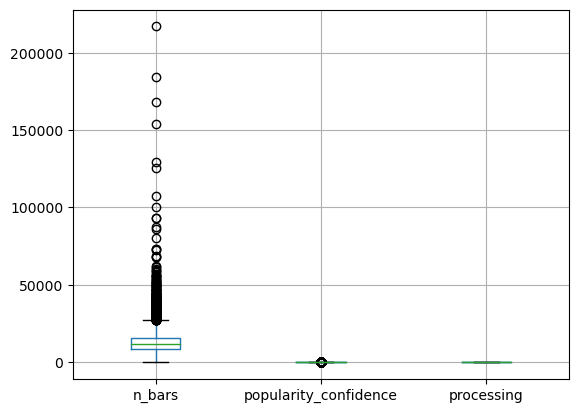

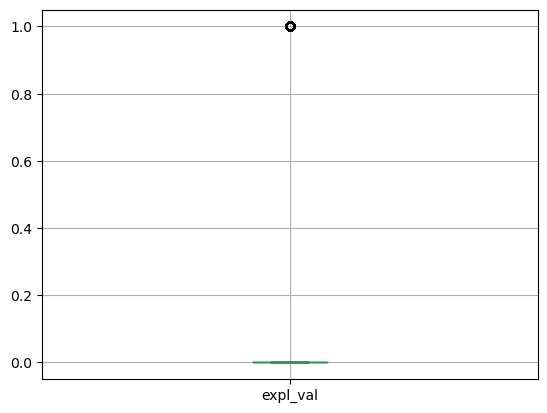

In [180]:
chiavi=df.keys()
for n in range(0, len(chiavi), 4):
    k=chiavi[n:(n+4)]
    sottodf=df[k]
    sottodf.boxplot()
    plt.show()
